<a href="https://colab.research.google.com/github/dubey93/new-debue/blob/master/14th_Oct_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install scikit-learn

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn

In [ ]:
# load boston house price dataset - 
# it is a part of sklearn's datasets module 

from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
# dataset is Bunch type (which is very close to dict)
type(dataset)

sklearn.utils.Bunch

In [ ]:
# things available inside dataset
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# data - all the independent variables 
# target - the dependent variable 
# feature_names - column name of independent variable 
# DESCR - description 
# filename - the file in which we have original data

In [ ]:
dataset.data.shape

(506, 13)

In [ ]:
dataset.target.shape

(506,)

In [ ]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(dataset.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.columns = dataset.feature_names

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df["PRICE"] = dataset.target

In [ ]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9
118,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37,20.4
246,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0


In [ ]:
# Phase I (Training)
# Phase II (Testing)
# Phase III (Prediction)

# Training - We need both input/ output for training of model 
# Testing - Similarly, in testing also we need both input/ output for testing of generated model
# 

In [ ]:
# Spliting of data into training & testing 
from sklearn.model_selection import train_test_split

In [ ]:
# Syntax train_test_split(df, test_size= percentage of random sample to be given to test dataset)
# Industry Standard 
# 70/30  - When you have more data and want to test it on all dimentions
# 80/20  - Normally we use 80/20 
# 90/10  - when you have very less data
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
df.shape # total shape

(506, 14)

In [ ]:
train_df.shape # shape of training data

(455, 14)

In [ ]:
test_df.shape # shape of testing data

(51, 14)

In [ ]:
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
234,0.44791,0.0,6.20,1.0,0.5070,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05,29.0
337,0.03041,0.0,5.19,0.0,0.5150,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56,18.5
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
132,0.59005,0.0,21.89,0.0,0.6240,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12,23.0
457,8.20058,0.0,18.10,0.0,0.7130,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5


In [ ]:
# get the linear model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X = train_df.drop(columns=["PRICE"]), 
       y = train_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([-9.79390162e-02,  4.06439564e-02,  6.21689529e-02,  2.92761401e+00,
       -1.91197508e+01,  4.40526572e+00, -2.13375764e-03, -1.39760992e+00,
        2.86986172e-01, -1.30999945e-02, -9.89016566e-01,  8.96191191e-03,
       -4.62214789e-01])

In [ ]:
lr.intercept_

33.32325752957155

In [ ]:
eq = ""
for coef, col in zip(lr.coef_, df.columns[:-1]):
  eq = eq + f"{round(coef,2)}*{col} + "

In [ ]:
eq = eq + str(round(lr.intercept_ , 2))

In [ ]:
eq

' -0.1*CRIM +  0.04*ZN +  0.06*INDUS +  2.93*CHAS +  -19.12*NOX +  4.41*RM +  -0.0*AGE +  -1.4*DIS +  0.29*RAD +  -0.01*TAX +  -0.99*PTRATIO +  0.01*B +  -0.46*LSTAT + 33.32'

In [ ]:
name = "Python"
print(f"My name is {name}, and my current stable version is {3 + 0.11}")

My name is Python, and my current stable version is 3.11


In [ ]:
round(lr.coef_[0], 2)

-0.1

In [ ]:
# Testing -

# trainX, trainY
# testX, testY 

# testX -->[Model]-->test_pred
#compare test_pred Vs testY

In [ ]:

test_pred = lr.predict(test_df.drop(columns=["PRICE"]))

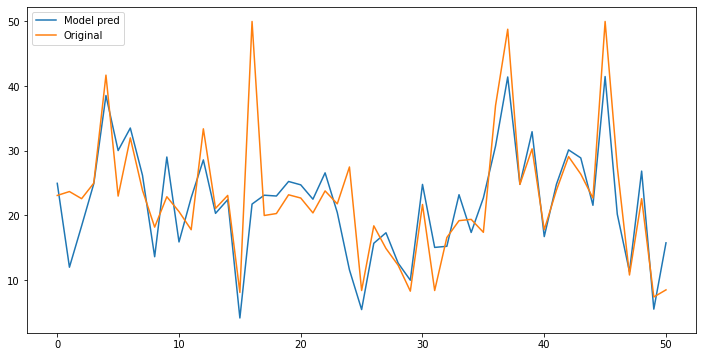

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_pred, label="Model pred")
plt.plot(test_df.PRICE.values, label="Original")

plt.legend()
plt.show()

In [ ]:
#Error 
np.mean(test_pred - test_df.PRICE)

-0.8862047274626533

In [ ]:
# Pred | Original | Error
# 10   |  15      |  -5
# 10   |   5      |  +5
#---------------------------
# Mean Error - ZERO 

In [ ]:
abs(-10)

10

In [ ]:
abs(10)

10

In [ ]:
np.mean(abs((test_pred - test_df.PRICE)))

4.080296295058327

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(test_df.PRICE, test_pred)

4.080296295058327

In [ ]:
# $230K +- 4K

In [ ]:
test_pred - test_df.PRICE

347     1.872064
214   -11.697657
359    -4.215821
324    -0.082683
232    -3.153518
219     7.039232
275     1.523367
293     2.315359
354    -4.577569
92      6.140700
355    -4.690327
453     4.952628
3      -4.807620
335    -0.771737
172    -0.653985
490    -3.946974
368   -28.233800
76      3.136434
121     2.710754
176     2.058473
164     2.038848
322     2.117553
168     2.793616
483    -1.339922
365   -15.907935
438    -2.948200
133    -2.694538
446     2.428414
383     0.332854
425     1.694219
294     3.103374
419     6.663016
26     -1.362335
117     4.013317
49     -2.022185
170     5.310251
190    -6.263701
262    -7.382088
251     0.040169
197     2.653410
139    -1.063622
84      0.914689
278     1.040604
302     2.499834
358    -1.125179
267    -8.517823
409    -7.307004
444     0.523417
90      4.261877
387    -1.879552
397     7.270862
Name: PRICE, dtype: float64

In [ ]:
np.mean((test_pred - test_df.PRICE)**2)

37.2804308382963

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_df.PRICE, test_pred)

37.280430838296304